In [1]:
#pip install numpy
#pip install pandas
#pip install urllib
#pip install seaborn
#pip install matplotlib
#pip install scipy
#pip install scikit-learn
#pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Installed and Imported the packages needed for the smooth execution

## Introduction

In this assignment, we are going to perform the analysis on the dataset which contains the information about the crime incidents by Boston Police Department (BPD). We are going to perform the basic analysis on dataset which includes primilanary analysis, Data visualization. After that we are going to answer the bussiness question using the regression model. Lastly, we will address how we can improve or reduce the crime rate.

## Data Extraction

For this Assignment we have used the Dataset of Crime incident Reports provided by the Boston Police Department (BPD) and Dataset is publicly available on the website https://data.boston.gov/dataset/. For this assignment we are going to use the dataset is about the year 2021 and we are going to download the dataset using python and store the dataset for the further execution.

Direct Link for the Dataset :- https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/f4495ee9-c42c-4019-82c1-d067f07e45d2/download/tmpsq1_rla4.csv

### Bussines Question:

1. Which offense has the highest crime rate?
2. How we can reduce the shooting rate?
3. Which District is unsafe?
4. Which months are safest and which are not?

In [3]:
#Retriving data from Internet

#Dataset link
url = 'https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/f4495ee9-c42c-4019-82c1-d067f07e45d2/download/tmpsq1_rla4.csv'

#retriving the dataset in current directory
urllib.request.urlretrieve(url, 'Crime_incident_Dataset.csv')


('Crime_incident_Dataset.csv', <http.client.HTTPMessage at 0x20db93a2b80>)

Now, we have sucessfully downloaded the csv file from the website and store in the current directory to access later.
After this we are going to read csv file and will start with the analysis.

In [4]:
#reading downloaded dataset file
df = pd.read_csv('Crime_incident_Dataset.csv')

df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,PLTEST005,520,NaN,BURGLARY - RESIDENTIAL,B2,289,0,2021-10-13 00:00:00,2021,10,Wednesday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
1,PLTEST003,3114,NaN,INVESTIGATE PROPERTY,B2,289,0,2021-05-12 00:00:00,2021,5,Wednesday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
2,PLTEST002,3114,NaN,INVESTIGATE PROPERTY,B2,289,0,2021-05-12 00:00:00,2021,5,Wednesday,0,NaN,SCHROEDER PLZ,42.333679,-71.091878,"(42.3336792181085, -71.0918775461846)"
3,PLTEST001,3114,NaN,INVESTIGATE PROPERTY,B2,,0,2021-03-29 00:00:00,2021,3,Monday,0,NaN,SCHROEDER PLAZA,0.000000,0.000000,"(0, 0)"
4,312030979,3201,NaN,PROPERTY - LOST/ MISSING,E13,465,0,2021-03-22 00:00:00,2021,3,Monday,0,NaN,BLUE HILL AVE,42.284826,-71.091374,"(42.2848257658049, -71.091373689388)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65701,121000816,3304,NaN,NOISY PARTY/RADIO-NO ARREST,E5,675,0,2021-01-04 00:00:00,2021,1,Monday,0,NaN,BRADFIELD AVENUE,0.000000,0.000000,"(0, 0)"
65702,120221042,3006,NaN,SICK/INJURED/MEDICAL - PERSON,E5,680,0,2021-04-02 10:45:00,2021,4,Friday,10,NaN,WASHINGTON ST,42.283902,-71.130863,"(42.2839024364831, -71.130862626435)"
65703,10637224,3125,NaN,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...,D4,270,0,2021-01-26 18:54:00,2021,1,Tuesday,18,NaN,NORTHAMPTON ST,42.333951,-71.075389,"(42.3339512483938, -71.0753893882269)"
65704,23844463,3115,NaN,INVESTIGATE PERSON,C6,,0,2021-10-16 01:16:00,2021,10,Saturday,1,NaN,G ST & E 8TH ST\nBOSTON MA 02127\nUNITED STATES,42.331320,-71.044080,"(42.3313200390092, -71.0440799616656)"


## Dataset Describtion

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65706 entries, 0 to 65705
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      65706 non-null  object 
 1   OFFENSE_CODE         65706 non-null  int64  
 2   OFFENSE_CODE_GROUP   0 non-null      float64
 3   OFFENSE_DESCRIPTION  65706 non-null  object 
 4   DISTRICT             64728 non-null  object 
 5   REPORTING_AREA       65706 non-null  object 
 6   SHOOTING             65706 non-null  int64  
 7   OCCURRED_ON_DATE     65706 non-null  object 
 8   YEAR                 65706 non-null  int64  
 9   MONTH                65706 non-null  int64  
 10  DAY_OF_WEEK          65706 non-null  object 
 11  HOUR                 65706 non-null  int64  
 12  UCR_PART             0 non-null      float64
 13  STREET               65027 non-null  object 
 14  Lat                  65706 non-null  float64
 15  Long                 65706 non-null 

In [6]:
df.describe(include = 'all')

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
count,65706,65706.000000,0.0,65706,64728,65706,65706.000000,65706,65706.0,65706.000000,65706,65706.000000,0.0,65027,65706.000000,65706.000000,65706
unique,65706,NaN,NaN,119,13,872,NaN,54930,NaN,NaN,7,NaN,NaN,7756,NaN,NaN,12173
top,212055458,NaN,NaN,INVESTIGATE PERSON,B2,,NaN,2021-02-01 00:00:00,NaN,NaN,Friday,NaN,NaN,WASHINGTON ST,NaN,NaN,"(0, 0)"
freq,1,NaN,NaN,6249,9051,12387,NaN,20,NaN,NaN,9982,NaN,NaN,4781,NaN,NaN,2619
mean,NaN,2432.483411,NaN,NaN,NaN,NaN,0.013134,NaN,2021.0,6.213679,NaN,12.814111,NaN,NaN,40.635837,-68.250115,NaN
std,NaN,1182.735489,NaN,NaN,NaN,NaN,0.113851,NaN,0.0,3.071861,NaN,6.358711,NaN,NaN,8.279679,13.906106,NaN
min,NaN,111.000000,NaN,NaN,NaN,NaN,0.000000,NaN,2021.0,1.000000,NaN,0.000000,NaN,NaN,0.000000,-71.178674,NaN
25%,NaN,1106.000000,NaN,NaN,NaN,NaN,0.000000,NaN,2021.0,4.000000,NaN,9.000000,NaN,NaN,42.294434,-71.096375,NaN
50%,NaN,3005.000000,NaN,NaN,NaN,NaN,0.000000,NaN,2021.0,6.000000,NaN,14.000000,NaN,NaN,42.325935,-71.075845,NaN
75%,NaN,3207.000000,NaN,NaN,NaN,NaN,0.000000,NaN,2021.0,9.000000,NaN,18.000000,NaN,NaN,42.348406,-71.059709,NaN


In [7]:
df.shape

(65706, 17)

In [8]:
df.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     65706
OFFENSE_DESCRIPTION        0
DISTRICT                 978
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               65706
STREET                   679
Lat                        0
Long                       0
Location                   0
dtype: int64

In [9]:
df.isna().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     65706
OFFENSE_DESCRIPTION        0
DISTRICT                 978
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART               65706
STREET                   679
Lat                        0
Long                       0
Location                   0
dtype: int64

In [10]:
for col in df:
    print ('\n Unique values of column: - %s'%col)
    print (df[col].unique())


 Unique values of column: - INCIDENT_NUMBER
['PLTEST005' 'PLTEST003' 'PLTEST002' ... 10637224 23844463 10584614]

 Unique values of column: - OFFENSE_CODE
[ 520 3114 3201 3301 3801 3802 3115 3001 1102 1402  801 3005  706 1300
 3831 2647 2905 2907  641  724 3006  301  540 1501  619 2610  613 3501
 2619  531 2632 3820  614  617 2670 3803 1810 3007 3110  423  615 3108
 3830 1106 2613 2648 1109 3502 3805 3207  735 3410 3503 1107 3126 3205
 1108 3018 2101 2403 1832  616 1415  736 1001  900 3811 3304 3112 1825
  612 3029 3111 2662 3810 2914  727  611 3821 2604 2612  111 3402 3807
 3625 3119 2646 2401 1201 3106 1304 2102 3130 3170 1602 3202 3116 3008
 2660 2657 3122 2616 2617  121 3125 2622 3004 2608 3203 2204 1601 2618
 2642  990 3403  618 3123 2628 3305]

 Unique values of column: - OFFENSE_CODE_GROUP
[nan]

 Unique values of column: - OFFENSE_DESCRIPTION
['BURGLARY - RESIDENTIAL' 'INVESTIGATE PROPERTY'
 'PROPERTY - LOST/ MISSING' 'VERBAL DISPUTE' 'M/V ACCIDENT - OTHER'
 'M/V ACCIDENT - PR

## Data Visualization

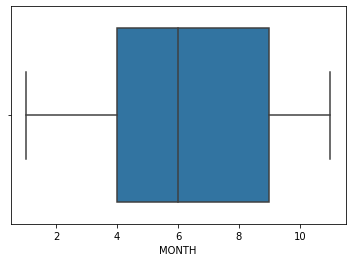

In [11]:
a=sns.boxplot(x=df['MONTH'])

Boxplot of the crime incidents based on the month represents that the most the crime incidents are happened between 3 to 8 month.

Text(0.5, 0, 'Type of Offense')

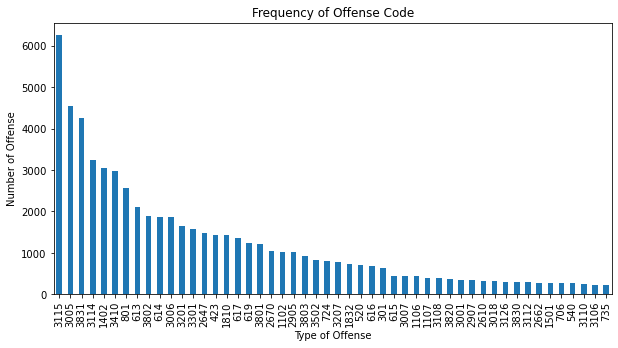

In [12]:
df['OFFENSE_CODE'].value_counts().nlargest(50).plot(kind='bar',figsize=(10,5))
plt.title('Frequency of Offense Code')
plt.ylabel('Number of Offense')
plt.xlabel('Type of Offense')

Above plot represents the types of offense and number of time it occured which shows that the 3115 is most recorded offense follwed by 3005 and 3831 which directly answer the bussiness question but we will also try to look at the same after cleaning the dataset

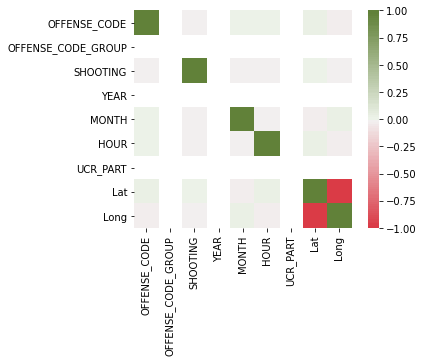

In [13]:
corr_df = df.corr()
ax = sns.heatmap(corr_df,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(10, 110, n=100),square=True)
plt.show()

It shows the correlation between each columns of the dataset and how they are interelated.

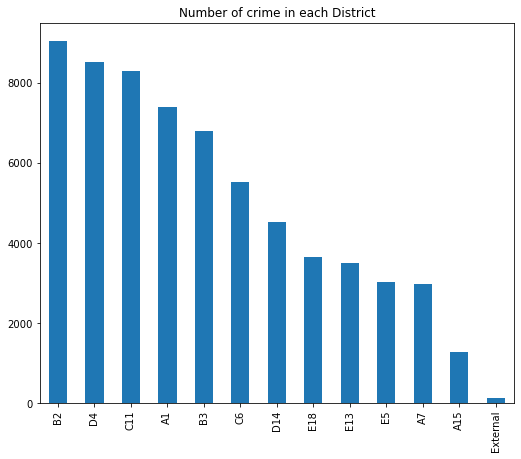

In [14]:
df['DISTRICT'].value_counts().plot(kind='bar', title="Number of crime in each District", figsize=(8.5, 7))
ax.set_xlabel("District")
ax.set_ylabel("Number of Crimes")   
plt.show()


Above plot shows the crime reported in the District and we can say that B2, D4 are unsafe district based on the crime records.This will help us to answer the bussiness question but we will also try to look at the same after cleaning the dataset

<AxesSubplot:ylabel='MONTH'>

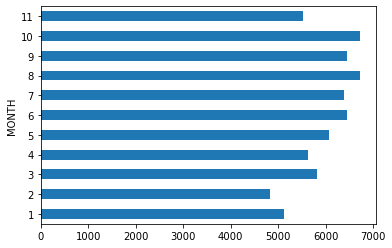

In [15]:
monthlyGrp = df.groupby(df['MONTH'])['INCIDENT_NUMBER'].agg('count')
monthlyGrp.plot(kind='barh')

Bar plot is able to show the crime incident count in each month and we can say 4 to 8 months are most vulnerable.

<AxesSubplot:xlabel='MONTH'>

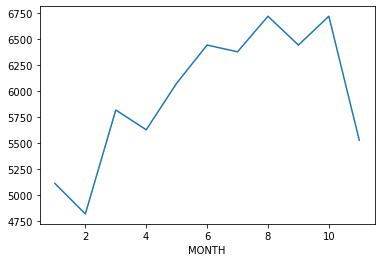

In [16]:
monthlyGrp.plot()

## Data Cleaning

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65706 entries, 0 to 65705
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   INCIDENT_NUMBER      65706 non-null  object 
 1   OFFENSE_CODE         65706 non-null  int64  
 2   OFFENSE_CODE_GROUP   0 non-null      float64
 3   OFFENSE_DESCRIPTION  65706 non-null  object 
 4   DISTRICT             64728 non-null  object 
 5   REPORTING_AREA       65706 non-null  object 
 6   SHOOTING             65706 non-null  int64  
 7   OCCURRED_ON_DATE     65706 non-null  object 
 8   YEAR                 65706 non-null  int64  
 9   MONTH                65706 non-null  int64  
 10  DAY_OF_WEEK          65706 non-null  object 
 11  HOUR                 65706 non-null  int64  
 12  UCR_PART             0 non-null      float64
 13  STREET               65027 non-null  object 
 14  Lat                  65706 non-null  float64
 15  Long                 65706 non-null 

In [18]:
#Droppping Null columns and unused column
df = df.drop(['OFFENSE_CODE_GROUP','UCR_PART','INCIDENT_NUMBER','OCCURRED_ON_DATE','OFFENSE_DESCRIPTION','Location'], axis = 1)

In Aboove steps, we have dropped the columns which contains the no data and other columns has no importanted data as it contains the unique of incidents and location which not imported for modeling as we have latitude and longitude in seperate columns as well.

In [19]:
for col in df:
    print ('\n Unique values of column: - %s'%col)
    print (df[col].unique())


 Unique values of column: - OFFENSE_CODE
[ 520 3114 3201 3301 3801 3802 3115 3001 1102 1402  801 3005  706 1300
 3831 2647 2905 2907  641  724 3006  301  540 1501  619 2610  613 3501
 2619  531 2632 3820  614  617 2670 3803 1810 3007 3110  423  615 3108
 3830 1106 2613 2648 1109 3502 3805 3207  735 3410 3503 1107 3126 3205
 1108 3018 2101 2403 1832  616 1415  736 1001  900 3811 3304 3112 1825
  612 3029 3111 2662 3810 2914  727  611 3821 2604 2612  111 3402 3807
 3625 3119 2646 2401 1201 3106 1304 2102 3130 3170 1602 3202 3116 3008
 2660 2657 3122 2616 2617  121 3125 2622 3004 2608 3203 2204 1601 2618
 2642  990 3403  618 3123 2628 3305]

 Unique values of column: - DISTRICT
['B2' 'E13' 'C11' 'A1' 'C6' 'D4' 'A7' 'E5' 'E18' 'D14' 'B3' 'A15' nan
 'External']

 Unique values of column: - REPORTING_AREA
['289' ' ' '465' '347' '204' '285' '68' '35' '200' '691' '183' '520' '784'
 '26' '138' '355' '574' '273' '320' '624' '20' '282' '77' '167' '810'
 '778' '527' '421' '577' '174' '350' '407' 

In [20]:
df.isnull().sum()

OFFENSE_CODE        0
DISTRICT          978
REPORTING_AREA      0
SHOOTING            0
YEAR                0
MONTH               0
DAY_OF_WEEK         0
HOUR                0
STREET            679
Lat                 0
Long                0
dtype: int64

In [21]:
#Dropping the NULL values
df = df.dropna()
df = df.drop(df[df.REPORTING_AREA == ' '].index)
df['REPORTING_AREA'] = pd.to_numeric(df['REPORTING_AREA'])

Dropping the rows which contains the blank data in REPORTING_AREA filed as this is imported for analysis and after that we are converting the datatype to numeric

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52381 entries, 0 to 65703
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OFFENSE_CODE    52381 non-null  int64  
 1   DISTRICT        52381 non-null  object 
 2   REPORTING_AREA  52381 non-null  int64  
 3   SHOOTING        52381 non-null  int64  
 4   YEAR            52381 non-null  int64  
 5   MONTH           52381 non-null  int64  
 6   DAY_OF_WEEK     52381 non-null  object 
 7   HOUR            52381 non-null  int64  
 8   STREET          52381 non-null  object 
 9   Lat             52381 non-null  float64
 10  Long            52381 non-null  float64
dtypes: float64(2), int64(6), object(3)
memory usage: 4.8+ MB


In [23]:
#df['DAY_OF_WEEK']=preprocessing.LabelEncoder().fit_transform( df ['DAY_OF_WEEK'] )
df['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].map({'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7})

Converted the Categorical into numeric.

In [24]:
df.head()

,OFFENSE_CODE,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
0,520,B2,289,0,2021,10,3,0,SCHROEDER PLZ,42.333679,-71.091878
1,3114,B2,289,0,2021,5,3,0,SCHROEDER PLZ,42.333679,-71.091878
2,3114,B2,289,0,2021,5,3,0,SCHROEDER PLZ,42.333679,-71.091878
4,3201,E13,465,0,2021,3,1,0,BLUE HILL AVE,42.284826,-71.091374
5,3301,C11,347,0,2021,7,3,20,LYON ST,42.306383,-71.060212


## Descriptive Analysis

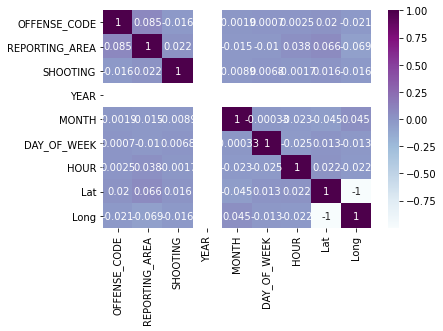

In [25]:
sns.heatmap(df.corr(),cmap='BuPu',annot=True)
plt.show()

<AxesSubplot:title={'center':'Number of crime in each District'}>

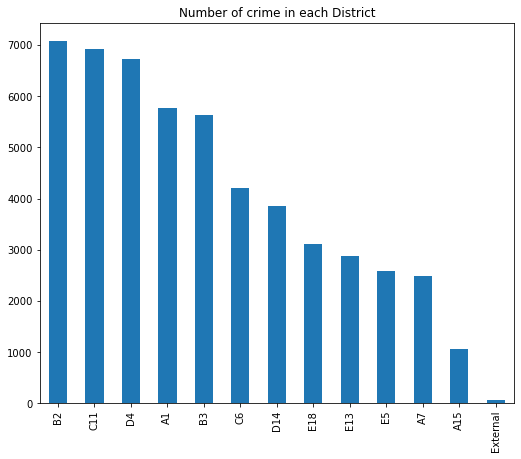

In [26]:
df['DISTRICT'].value_counts().plot(kind='bar', title="Number of crime in each District", figsize=(8.5, 7))

Text(0.5, 0, 'Month')

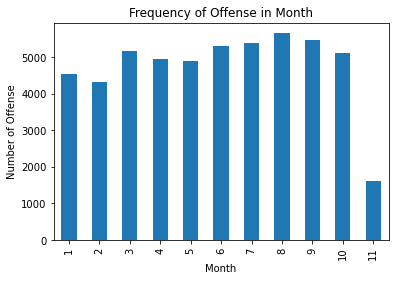

In [27]:
monthlyGrp = df.groupby(df['MONTH'])['DISTRICT'].agg('count')
monthlyGrp.plot(kind = 'bar')
plt.title('Frequency of Offense in Month')
plt.ylabel('Number of Offense')
plt.xlabel('Month')

Text(0.5, 0, 'Type of Offense')

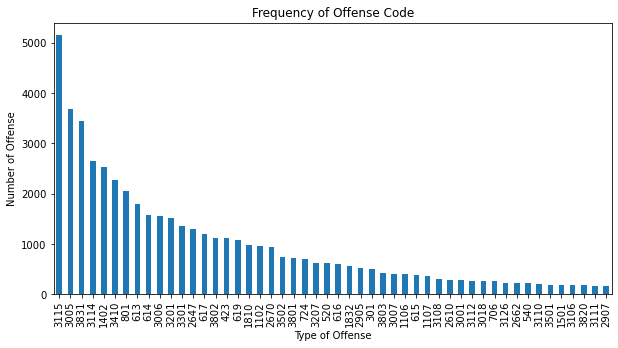

In [28]:
df['OFFENSE_CODE'].value_counts().nlargest(50).plot(kind='bar',figsize=(10,5))
plt.title('Frequency of Offense Code')
plt.ylabel('Number of Offense')
plt.xlabel('Type of Offense')

## Predictive analysis

#### Preparing the dataset for the Logistic model

In [29]:
df = pd.get_dummies(df, columns=['DISTRICT'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52381 entries, 0 to 65703
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OFFENSE_CODE       52381 non-null  int64  
 1   REPORTING_AREA     52381 non-null  int64  
 2   SHOOTING           52381 non-null  int64  
 3   YEAR               52381 non-null  int64  
 4   MONTH              52381 non-null  int64  
 5   DAY_OF_WEEK        52381 non-null  int64  
 6   HOUR               52381 non-null  int64  
 7   STREET             52381 non-null  object 
 8   Lat                52381 non-null  float64
 9   Long               52381 non-null  float64
 10  DISTRICT_A1        52381 non-null  uint8  
 11  DISTRICT_A15       52381 non-null  uint8  
 12  DISTRICT_A7        52381 non-null  uint8  
 13  DISTRICT_B2        52381 non-null  uint8  
 14  DISTRICT_B3        52381 non-null  uint8  
 15  DISTRICT_C11       52381 non-null  uint8  
 16  DISTRICT_C6        523

Created the Dummy variables for the district

In [30]:
y = df['SHOOTING']
x = df.drop(['SHOOTING','STREET'], axis = 1)

Divided the dataset into two part as Shooting as Depenedent variable and Other parameter as Independent variables. Also we are going to divide the dataset into 7:3 ratio for train and test dataset

In [31]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.3 ,random_state=9)

### How we can reduce the shooting rate?
For this we need to know the independent variable affeced the dependent variable (Shooting) to reduce the shooting rate.

In [32]:
xConstant = sm.add_constant(x)
lmodel = sm.Logit(y, xConstant) 
lmodelFit = lmodel.fit()
print(lmodelFit.summary())

Optimization terminated successfully.
         Current function value: 0.060495
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               SHOOTING   No. Observations:                52381
Model:                          Logit   Df Residuals:                    52361
Method:                           MLE   Df Model:                           19
Date:                Wed, 01 Dec 2021   Pseudo R-squ.:                 0.08637
Time:                        18:19:45   Log-Likelihood:                -3168.8
converged:                       True   LL-Null:                       -3468.3
Covariance Type:            nonrobust   LLR p-value:                7.760e-115
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
OFFENSE_CODE         -0.0002   3.31e-05     -6.282      0.000      -0.000      -0.000
REPORTI

After exection of the model, we know that how independent variable affects the shooting. Let's reduce the result to know more.

In [33]:
pVal = pd.DataFrame(lmodelFit.pvalues, columns=['pValue'])
coefVal = pd.DataFrame(lmodelFit.params, columns= ['coef'])
LReg = pd.concat([pVal, coefVal], axis = 1)
LReg[(LReg['pValue'] < 0.05)==True]

,pValue,coef
OFFENSE_CODE,3.352801e-10,-0.000208
REPORTING_AREA,2.198635e-04,0.001027


Now, we have two most significant variable which are affected the shooting rate which we can use to reduce the rate.

In [34]:
logisticReg = LogisticRegression()
model = logisticReg.fit(xTrain, yTrain)

In [35]:
yLPred = logisticReg.predict(xTest)
print(confusion_matrix(yTest, model.predict(xTest)))

[[15537     0]
 [  178     0]]


In [36]:
print("Classification report - \n", classification_report(yTest,yLPred))

Classification report - 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     15537
           1       0.00      0.00      0.00       178

    accuracy                           0.99     15715
   macro avg       0.49      0.50      0.50     15715
weighted avg       0.98      0.99      0.98     15715



Accuracy of the model is 99% which indicates that the logisitic model performed well and we can make use of this to reduce the shooting incidents.

## Conclusion

In the conclusion of the this assignment, we have utilised the various method and techniques we learned throughout the course to solve this assignment. We have downloaded the publicly available dataset and performed the exploriatory data analysis and created viuslization. Apart from that after data cleaning, we have created some Descriptive and Predictive analysis for that we have used the logistic model to know how we can reduce the crime rate and overall it was difficult to perform the analysis but I enjoyed the whole process of assignment.  


# Reference
### 
Robinson, S. (2017, October 31). Download Files with Python. Stack Abuse. https://stackabuse.com/download-files-with-python/

Gallagher, J. (2021, January 20). Python Average: A Step-by-Step Guide. Career Karma. https://careerkarma.com/blog/python-average/

sklearn.preprocessing.LabelEncoder — scikit-learn 0.24.2 documentation. (n.d.). Https://Scikit-Learn.Org/Stable/Modules/Generated/Sklearn.Preprocessing.LabelEncoder.Html
